## Descarga el dataset del siguiente enlace

https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

## Cargar el dataset

In [1]:
import pandas as pd

df = pd.read_csv('SOCR-HeightWeight.csv')

In [3]:
df.shape

(25000, 3)

In [2]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

## Transforma los valores a cm y kg

In [8]:
df['Altura'] = df['Height(Inches)'] * 2.54
df['Peso'] = df['Weight(Pounds)'] * 0.453592

df.drop(['Height(Inches)', 'Weight(Pounds)'], axis=1, inplace=True)

## Visualiza los datos. Altura en el eje X y Peso en el eje Y

Toma solo un subset de los datos para que la visualización mejore

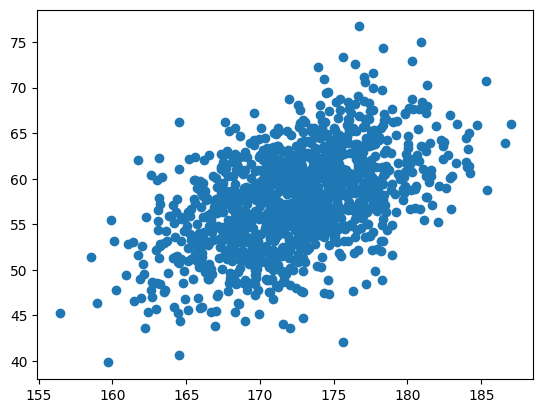

In [14]:
import matplotlib.pyplot as plt

# Tomar un subconjunto aleatorio del 10% de los datos
subset_df = df.sample(frac=0.05, random_state=1)

plt.scatter(subset_df['Altura'], subset_df['Peso'])

## Utiliza la librería numpy para extraer X y Y del dataset

- Investiga que tambien podemos utilizar en lugar de 'shape' cuando trabajamos con numpy arrays.
- Imprime el shape de X y Y para confirmar sus tamaños
- Reshape **X** y **y** para que sean matrices. e.g (25000,) a (25000,1)

In [18]:
import numpy as np

X = np.array(df['Altura'])
y = np.array(df['Peso'])

In [19]:
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (25000,)
Y shape: (25000,)


In [24]:
# -1 significa que se ajusta al tamaño de la otra dimensión. También se puede usar X.reshape(X.size, 1)

X = X.reshape(-1, 1) # -1 significa que se ajusta al tamaño de la otra dimensión
y = y.reshape(-1, 1)

In [25]:
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (25000, 1)
Y shape: (25000, 1)


## Incluye la columna de unos a nuestros features (X)

- Imprime la nueva forma de X
- Verifica que tengas la columna de 1s (unos) incorporada
- Incluye la columna utilizando np.concatenate

In [26]:
ones = np.ones([X.shape[0], 1])
X = np.concatenate([ones, X], 1)

In [28]:
X.shape

(25000, 2)

In [29]:
X

array([[  1.       , 167.0896074],
       [  1.       , 181.6486334],
       [  1.       , 176.2727996],
       ...,
       [  1.       , 164.334317 ],
       [  1.       , 171.5241172],
       [  1.       , 174.9491294]])

## Recapitulación: Regresión Lineal

### Ecuación lineal

$\hat{y} = \theta_{1} x_{1} + \theta_{2}$

### Usando matrices

$\hat{Y} = X \cdot \theta$

### Cost Function

$\text{cost} = \frac{1}{2m} \sum (Y - {\hat{Y}})^2$


### Gradient Descent (Algoritmo)

- Inicializar $\theta$ a cero 

- Repetir durante $i$ iteracciones:
    - $\hat{Y} = X \cdot \theta$

    - $\text{cost} = \frac{1}{2m} \sum ({\hat{Y}}- Y)^2$

    - $d\theta = \frac{1}{m} X^T \cdot ({\hat{Y}} - Y)$

    - $\theta = \theta - \alpha \cdot d\theta$

## Implementa el algoritmo de Gradient Descent

- Comienza con 1000 iteraciones y luego cámbialo para explorar como cambia las métricas del modelo

In [1]:

class MyLinearRegression:

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        m = y.size

        # Inicializar los parámetros theta
        self.theta = np.zeros([2, 1])

        for i in range(self.iterations):
            # Calcular y_hat (hypotesis)
            y_hat = X.dot(self.theta)

            # Calcular el costo
            cost = (1/(2*m)) * np.sum(np.square(y_hat-y))

            # Calcular el gradiente
            d_theta = (1/m) * X.T.dot(y_hat-y)

            # Actualizar los parámetros theta
            self.theta = self.theta - (self.learning_rate * d_theta)

            if i % 100 == 0:
                print(f'Iteración {i} - Costo: {cost}')

    def predict(self, X):
        return X.dot(self.theta)
    

## Separa el dataset en training 80% y testing 20%

- Utiliza un random_state = 0

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrena tu algoritmo con los datos de entrenamiento y evalualo con los datos de prueba

- Utiliza un learning rate = 0.00000005
- Intenta con un número diferente de iteraciones. Cuándo converge el algoritmo?

In [82]:
lr = MyLinearRegression(learning_rate=0.00000005, iterations=3000)

In [83]:
lr.fit(X_train, y_train)

Iteración 0 - Costo: 1676.2322791405354
Iteración 100 - Costo: 1246.2304867103435
Iteración 200 - Costo: 927.2578018951044
Iteración 300 - Costo: 690.6458262022891
Iteración 400 - Costo: 515.1285179607593
Iteración 500 - Costo: 384.9308582598328
Iteración 600 - Costo: 288.35103509892053
Iteración 700 - Costo: 216.70871631028007
Iteración 800 - Costo: 163.5648848819695
Iteración 900 - Costo: 124.14311759896898
Iteración 1000 - Costo: 94.90029309870711
Iteración 1100 - Costo: 73.20814574709257
Iteración 1200 - Costo: 57.11704426242033
Iteración 1300 - Costo: 45.18076415151337
Iteración 1400 - Costo: 36.32650498061901
Iteración 1500 - Costo: 29.758469986451104
Iteración 1600 - Costo: 24.886342024707755
Iteración 1700 - Costo: 21.27222746860732
Iteración 1800 - Costo: 18.591299519154045
Iteración 1900 - Costo: 16.602603654763943
Iteración 2000 - Costo: 15.127401293364445
Iteración 2100 - Costo: 14.03310525414056
Iteración 2200 - Costo: 13.221363181867309
Iteración 2300 - Costo: 12.61921790

In [84]:
y_pred = lr.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print('Error cuadrático medio:', mse)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación:', r2)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print('Error absoluto medio:', mae)

23.16017748120164

## Utiliza la librería sklearn y utiliza el modelo de regresión lineal. Compara los resultados con tu modelo

In [1]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()


In [2]:
lr2.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [88]:
y_pred = lr2.predict(X_test)

In [89]:
mean_squared_error(y_test, y_pred)

21.614201057421003